<a href="https://colab.research.google.com/github/Rtrey29/Project1/blob/master/DS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Importing data set into a pandas dataframe

In [0]:
df = pd.read_csv('https://github.com/Rtrey29/Projects/raw/master/US_leading_cause_of_death.csv')
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


##Data cleaning & feature dropping

In [0]:
df.dtypes

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

In [0]:
# dropping 113 causename feature
df = df.drop('113 Cause Name', axis=1)
df.head()


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,Kidney disease,Vermont,21,2.6
1,2016,Kidney disease,Vermont,30,3.7
2,2013,Kidney disease,Vermont,30,3.8
3,2000,Suicide,District of Columbia,23,3.8
4,2014,Kidney disease,Arizona,325,4.1


In [0]:
# dropping rows that have 'All Causes'
df = df[df['Cause Name'] != 'All causes']

##States Dictionary


In [0]:
states = {
        1: 'Alabama',
        2: 'Alaska',
        3: 'Arkansas',
        4: 'Arizona',
        5: 'California',
        6: 'Colorado',
        7: 'Connecticut',
        8: 'District of Columbia',
        9: 'Delaware',
        10: 'Florida',
        11: 'Georgia',
        12: 'Hawaii',
        13: 'Iowa',
        14: 'Idaho',
        15: 'Illinois',
        16: 'Indiana',
        17: 'Kansas',
        18: 'Kentucky',
        19: 'Louisiana',
        20: 'Massachusetts',
        21: 'Maryland',
        22: 'Maine',
        23: 'Michigan',
        24: 'Minnesota',
        25: 'Missouri',
        26: 'Mississippi',
        27: 'Montana',
        28: 'North Carolina',
        29: 'North Dakota',
        30: 'Nebraska',
        31: 'New Hampshire',
        32: 'New Jersey',
        33: 'New Mexico',
        34: 'Nevada',
        35: 'New York',
        36: 'Ohio',
        37: 'Oklahoma',
        38: 'Oregon',
        39: 'Pennsylvania',
        40: 'Rhode Island',
        41: 'South Carolina',
        42: 'South Dakota',
        43: 'Tennessee',
        44: 'Texas',
        45: 'Utah',
        46: 'Virginia',
        47: 'Vermont',
        48: 'Washington',
        49: 'Wisconsin',
        50: 'West Virginia',
        51: 'Wyoming'
}

##2016 all deaths for stacked bar plot

In [0]:
all16 = df[(df['Year'] == 2016) & (df['State'] != 'United States')]


In [0]:
all16

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2016,Kidney disease,Vermont,30,3.7
14,2016,Suicide,District of Columbia,40,5.2
28,2016,Kidney disease,Arizona,487,5.7
70,2016,Kidney disease,Washington,532,6.6
98,2016,Influenza and pneumonia,Vermont,59,7.0
117,2016,Suicide,New Jersey,687,7.2
136,2016,Kidney disease,South Dakota,90,7.6
142,2016,Kidney disease,Oregon,398,7.7
151,2016,Influenza and pneumonia,Minnesota,529,7.8
186,2016,Suicide,New York,1679,8.1


In [0]:
table= pd.pivot_table(all16, values='Deaths', index='State', columns='Cause Name', aggfunc='sum', margins=True, margins_name='Total')
table= table.iloc[:-1]
table

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries,Total
State,,,,,,,,,,,
Alabama,2507,3326,10419,1183,12832,987,1012,2967,788,2755,38776
Alaska,111,238,995,124,831,61,53,196,193,439,3241
Arizona,3082,3800,11876,2025,11957,885,487,2556,1271,4010,41949
Arkansas,1475,2169,6612,920,8090,623,722,1643,555,1604,24413
California,15570,13710,59515,9124,61573,5981,3640,15680,4294,13213,202300
Colorado,1835,2575,7928,938,7277,533,491,1927,1168,2880,27552
Connecticut,1035,1425,6696,699,7051,572,570,1269,397,1978,21692
Delaware,329,544,2124,203,1974,132,208,506,119,516,6655
District of Columbia,120,152,1044,127,1375,78,57,252,40,401,3646


In [0]:

table = table.sort_values(by='Total', ascending=False)
table = table.drop(['Total'], axis=1)
table


Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
California,15570,13710,59515,9124,61573,5981,3640,15680,4294,13213
Florida,7155,11970,44266,5782,45659,2808,3144,11854,3143,12561
Texas,9135,10107,40195,5470,43772,2860,4125,10673,3488,10536
New York,3349,6860,35368,4038,44076,4513,2385,6258,1679,7354
Pennsylvania,4185,6523,28492,3560,31990,2491,2813,6730,1970,8410
Ohio,5031,7015,25509,3568,27410,2187,2262,5987,1707,7999
Illinois,3877,5632,24389,2781,25013,2178,2518,5658,1415,5508
Michigan,4249,5572,20870,2672,25304,1672,1791,4874,1364,5313
North Carolina,4153,5311,19523,2811,18266,1896,2002,4940,1373,5476


#Causes of death by state Bar plot

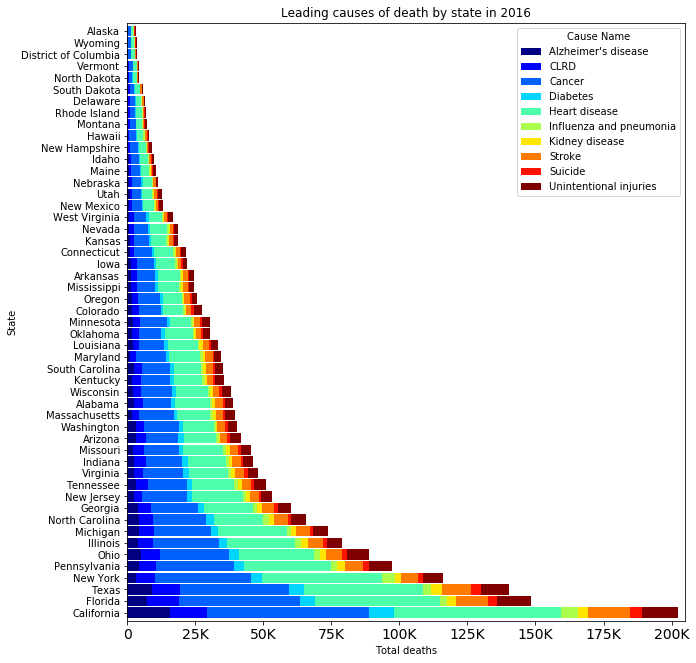

In [0]:
ax = table.plot(colormap = 'jet', kind='barh',title = 'Leading causes of death by state in 2016', width = .9, stacked=True, figsize=(10,11));
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Total deaths");
ax.set_xlim(right=205000);
x_ticks_labels = ['0', '25K', '50K', '75K', '100K','125K', '150K', 
          '175K', '200K']
ax.set_xticklabels(x_ticks_labels, fontsize=14);



#Standardized table

In [0]:
table2= pd.pivot_table(all16, values='Deaths', index='State', columns='Cause Name')
table2= table2.iloc[:-1]
table2

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
Alabama,2507,3326,10419,1183,12832,987,1012,2967,788,2755
Alaska,111,238,995,124,831,61,53,196,193,439
Arizona,3082,3800,11876,2025,11957,885,487,2556,1271,4010
Arkansas,1475,2169,6612,920,8090,623,722,1643,555,1604
California,15570,13710,59515,9124,61573,5981,3640,15680,4294,13213
Colorado,1835,2575,7928,938,7277,533,491,1927,1168,2880
Connecticut,1035,1425,6696,699,7051,572,570,1269,397,1978
Delaware,329,544,2124,203,1974,132,208,506,119,516
District of Columbia,120,152,1044,127,1375,78,57,252,40,401


In [0]:
Z = table2.apply(lambda x: x/x.sum(), axis=1) 
Z

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
Alabama,0.064653,0.085775,0.268697,0.030509,0.330926,0.025454,0.026099,0.076516,0.020322,0.071049
Alaska,0.034249,0.073434,0.307004,0.038260,0.256402,0.018821,0.016353,0.060475,0.059550,0.135452
Arizona,0.073470,0.090586,0.283106,0.048273,0.285037,0.021097,0.011609,0.060931,0.030299,0.095592
Arkansas,0.060419,0.088846,0.270839,0.037685,0.331381,0.025519,0.029574,0.067300,0.022734,0.065703
California,0.076965,0.067771,0.294192,0.045101,0.304365,0.029565,0.017993,0.077509,0.021226,0.065314
Colorado,0.066601,0.093460,0.287747,0.034045,0.264119,0.019345,0.017821,0.069940,0.042393,0.104530
Connecticut,0.047713,0.065692,0.308685,0.032224,0.325051,0.026369,0.026277,0.058501,0.018302,0.091186
Delaware,0.049437,0.081743,0.319159,0.030503,0.296619,0.019835,0.031255,0.076033,0.017881,0.077536
District of Columbia,0.032913,0.041690,0.286341,0.034833,0.377126,0.021393,0.015634,0.069117,0.010971,0.109984


#standardized Bar plot

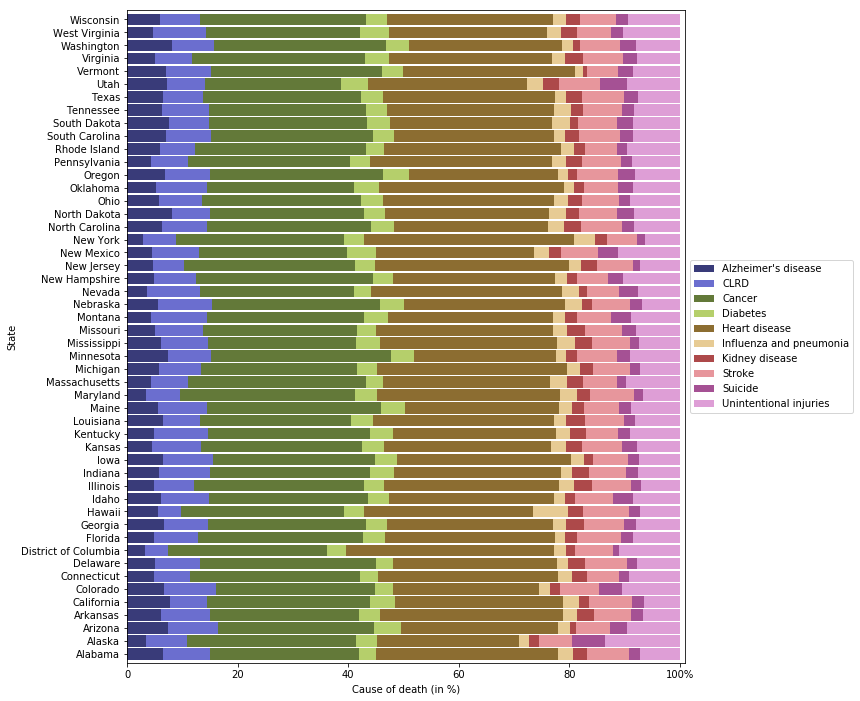

In [0]:
ax = Z.plot(kind='barh',colormap = 'tab20b', stacked='True', width =.875, figsize=(10,12));
ax.set_xlim(right=1.01);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_xticklabels(['0', '20', '40', '60', '80', '100%']);
ax.set_xlabel('Cause of death (in %)');

#Total deaths by type


In [0]:
heart16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Heart disease')]
heart_sum = heart16['Deaths'].sum()

In [0]:
alz16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Alzheimer\'s disease')]
alz_sum = alz16['Deaths'].sum()

In [0]:
clrd16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'CLRD')]
clrd_sum = clrd16['Deaths'].sum()

In [0]:
ca16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Cancer')]
ca_sum = ca16['Deaths'].sum()

In [0]:
diab16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Diabetes')]
diab_sum = diab16['Deaths'].sum()

In [0]:
ip16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Influenza and pneumonia')]
ip_sum = ip16['Deaths'].sum()

In [0]:
kidney16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Kidney disease')]
kidney_sum = kidney16['Deaths'].sum()

In [0]:
stroke16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Stroke')]
stroke_sum = stroke16['Deaths'].sum()

In [0]:
sui16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Suicide')]
sui_sum = sui16['Deaths'].sum()

In [0]:
ui16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Unintentional injuries')]
ui_sum = ui16['Deaths'].sum()

In [0]:
dft = pd.DataFrame(columns=['Cause Name', 'Total deaths'])
dft = dft.append({'Cause Name': 'Heart disease', 'Total deaths': heart_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Alzheimer\'s disease', 'Total deaths': alz_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'CLRD', 'Total deaths': clrd_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Cancer', 'Total deaths': ca_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Diabetes', 'Total deaths': diab_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Influenza and pneumonia', 'Total deaths': ip_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Kidney disease', 'Total deaths': kidney_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Stroke', 'Total deaths': stroke_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Suicide', 'Total deaths': sui_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Unintentional injuries', 'Total deaths': ui_sum}, ignore_index=True)

dft

,Cause Name,Total deaths
0,Heart disease,1270520
1,Alzheimer's disease,232206
2,CLRD,309192
3,Cancer,1196076
4,Diabetes,160116
5,Influenza and pneumonia,103074
6,Kidney disease,100092
7,Stroke,284284
8,Suicide,89930
9,Unintentional injuries,322748


In [0]:
df_sort= dft.sort_values('Total deaths', ascending = True)
df_sort=df_sort.reset_index(drop=True)
df_sort

,Cause Name,Total deaths
0,Suicide,89930
1,Kidney disease,100092
2,Influenza and pneumonia,103074
3,Diabetes,160116
4,Alzheimer's disease,232206
5,Stroke,284284
6,CLRD,309192
7,Unintentional injuries,322748
8,Cancer,1196076
9,Heart disease,1270520


#Total Deaths Bar plot

<Figure size 424x280 with 0 Axes>

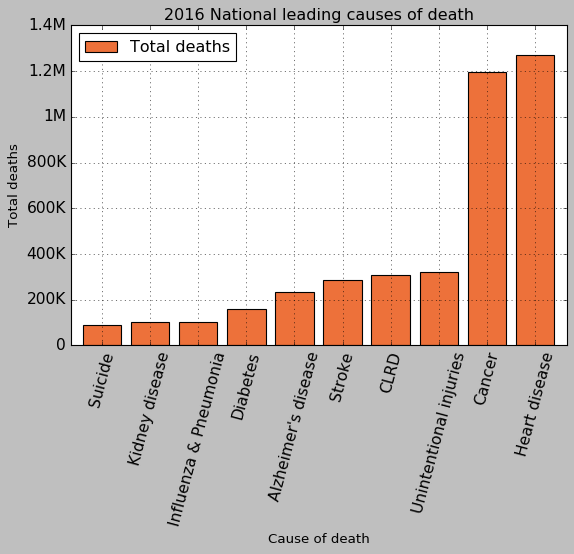

In [0]:
plt.style.use('classic');
fig = plt.figure(figsize=(5.3,3.5));


# plot, colors and bar width
ax = df_sort.plot.bar(color='#ED713A', title = '2016 National leading causes of death', width = 0.8, 
                       figsize=(8,5));

x_ticks_labels = ['Suicide', 'Kidney disease', 'Influenza & Pneumonia', 'Diabetes', 'Alzheimer\'s disease', 'Stroke', 'CLRD', 
          'Unintentional injuries', 'Cancer', 'Heart disease']
y_ticks_labels = [0, '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']
ax.set_xticklabels(x_ticks_labels, fontsize=14, rotation='75');
ax.set_yticklabels(y_ticks_labels, fontsize=14);
ax.set_ylabel("Total deaths");
ax.set_xlabel('Cause of death');
plt.grid(True);
plt.show();